In [2]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


Imports

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

I load my database into a Dataframe

In [4]:
df = pd.read_csv("F:\Proyectos\Credit Card Fraud detection\Credit-Fraud-detection\creditcard.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Jorge\AppData\Local\Temp\ipykernel_12624\3383548068.py:1: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv("F:\Proyectos\Credit Card Fraud detection\Credit-Fraud-detection\creditcard.csv")


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


If we read the documentation we can only know what are exactly 2 features: time and amount. Time is the tikme that passed between the nth transaction and the fisrt one. Amount is the quantity of money. We also have class (0 = nice transaction, 1 = fraud).

First we want to know some information of the dataframe:
- Missing values
- Entries
- Datatypes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

As we can observe we have no missing values.

Now I want to study the distributions of our "class" feature

Class
0    284315
1       492
Name: count, dtype: int64

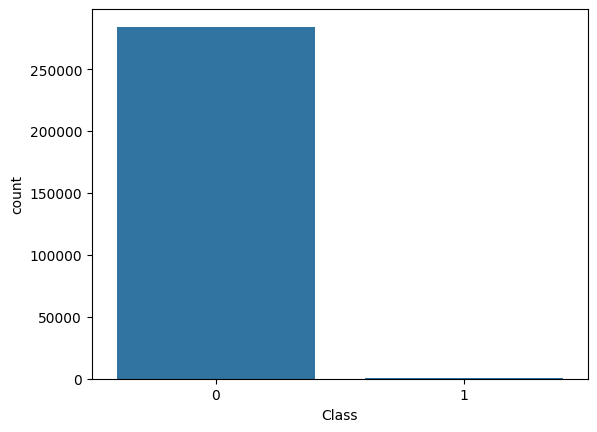

In [6]:
sns.countplot(df, x = "Class")
df["Class"].value_counts()

Very unbalanced dataset, there are too much more of legit transactions. I create two subsets, separating them by the value on the feature Class

In [7]:
legit = df[df["Class"]== 0]
fraud = df[df["Class"]== 1]
fraud.shape

(492, 31)

I need to study the statistics of each subset


In [8]:
print(legit["Amount"].describe())
print(fraud["Amount"].describe())

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [9]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Now we need to balance the data. The technique I will use is undersampling. This is building a sample dataset with a new distribution. I will tage a random sample for the legit subset of 492 observations. That is the same quantity of fraudulent transactions that we have.

In [10]:
legit_sample = legit.sample(n = 492)
legit_sample.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,94774.156504,0.145934,-0.084546,-0.007110,-0.016990,-0.040402,-0.007333,-0.026686,-0.003940,-0.027664,...,-0.054735,-0.010131,0.052205,-0.073012,0.008385,0.036698,0.006856,0.023478,89.485874,0.0
std,47064.991942,1.901883,1.621727,1.378931,1.303156,1.556207,1.340003,1.400304,1.377488,0.986638,...,0.858631,0.700837,0.498252,0.612287,0.517292,0.487255,0.297989,0.484464,232.704499,0.0
min,626.000000,-17.085535,-15.778816,-7.104205,-4.086986,-20.454913,-5.773930,-15.420812,-24.520275,-2.919213,...,-13.950186,-3.321745,-1.702776,-2.032276,-2.506839,-1.322329,-3.402001,-2.017688,0.000000,0.0
25%,53872.000000,-0.779339,-0.617310,-0.749764,-0.774418,-0.709460,-0.739651,-0.604699,-0.206133,-0.605128,...,-0.225220,-0.542256,-0.130614,-0.417089,-0.292136,-0.303910,-0.070478,-0.049348,5.127500,0.0
50%,84922.500000,0.198003,-0.029080,0.202048,0.042030,-0.107463,-0.257275,-0.001773,0.031512,-0.000241,...,-0.044350,-0.032911,-0.006454,-0.022181,0.002379,-0.007787,0.001429,0.012003,21.025000,0.0
75%,137987.500000,1.398770,0.741400,1.009644,0.699579,0.604071,0.354818,0.454006,0.286103,0.568298,...,0.174268,0.498081,0.163557,0.410087,0.355289,0.247486,0.109896,0.067491,76.582500,0.0
max,172245.000000,2.366845,9.681705,3.580663,4.764622,9.156176,11.038675,17.416779,4.293589,4.419944,...,7.405018,3.438142,4.960941,1.209878,2.297224,2.438433,2.183362,9.718743,3690.240000,0.0


In [11]:
even_df = pd.concat([legit_sample, fraud], axis = 0)
even_df["Class"].value_counts()
even_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94774.156504,0.145934,-0.084546,-0.007110,-0.016990,-0.040402,-0.007333,-0.026686,-0.003940,-0.027664,...,-0.001658,-0.054735,-0.010131,0.052205,-0.073012,0.008385,0.036698,0.006856,0.023478,89.485874
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Now I start the process to split the data into training and testing samples.

In [12]:
X = even_df.drop("Class", axis = 1)
Y = even_df["Class"]
print(X.head())
print(Y)


            Time        V1        V2        V3        V4        V5        V6  \
26895    34299.0  1.043639 -0.148662  1.266736  1.231991 -1.108750 -0.241537   
197792  132183.0  2.136857 -1.034275 -0.554324 -0.957283 -1.003329 -0.277663   
148980   90395.0 -0.323330  0.842451  3.580663  4.764622 -0.130618  2.935544   
268342  163162.0 -0.593214 -0.235099 -0.430987 -1.589661  1.448094 -1.061898   
135930   81467.0 -0.775413  0.993969  1.518397 -0.180392 -0.020025 -0.300617   

              V7        V8        V9  ...       V20       V21       V22  \
26895  -0.649410  0.229647  0.384781  ... -0.114844  0.177349  0.362388   
197792 -1.115837  0.040602 -0.080390  ... -0.030161  0.356333  1.089231   
148980 -0.782019  0.500292  1.125381  ...  0.274848 -0.150196  0.404414   
268342  1.575728 -0.558151 -2.211040  ... -0.135054  0.041745  0.458565   
135930  0.397201  0.283726 -0.301777  ...  0.113116 -0.181951 -0.448742   

             V23       V24       V25       V26       V27       V28  

In [13]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.3,stratify=Y ,random_state=42 )
print(X.shape,X_train.shape, X_test.shape)

(984, 30) (688, 30) (296, 30)


Now we can train our Model, Logistic Regression fits well for problems as this one, where we have to binary variables. Maybe we can try differnet models and compare their accuracy in this case.

In [14]:
model = LogisticRegression()
#train the model with training data
model.fit(X_train, Y_train)

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

We have to evaluate the model.

Accuracy Training Data

In [15]:
X_train_prediction = model.predict(X_train)
training_ac = accuracy_score(X_train_prediction, Y_train)
print(training_ac)

0.9505813953488372


Accuracy testing data

In [16]:
X_test_prediction = model.predict(X_test)
test_ac = accuracy_score(X_test_prediction, Y_test)
print(test_ac)

[0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1
 0 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0
 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1
 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0
 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1
 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1
 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 1
 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1]
0.9493243243243243


As we have two values very simiular we can dconsiderr that our model is correct or preety good.

Confussion Matrix


([<matplotlib.axis.YTick at 0x1f72b2a2750>,
 [Text(0, 0, 'Class 0'), Text(0, 1, 'Class 1')])

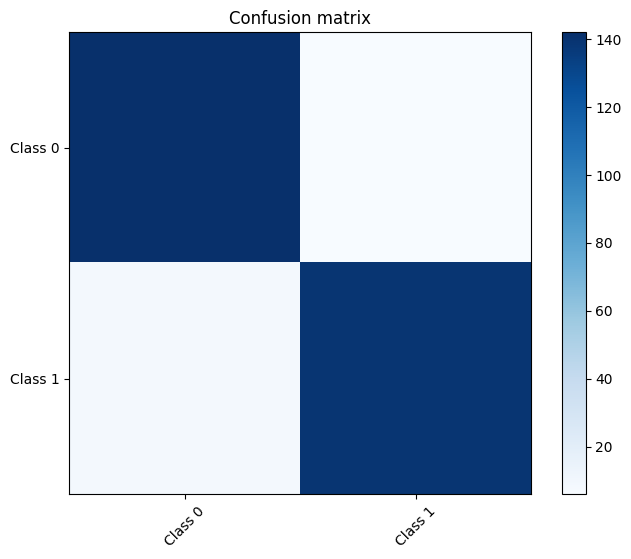

In [22]:
cm = confusion_matrix(Y_test, X_test_prediction)
# Define classes
classes = ['Class 0', 'Class 1']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

In [23]:
print(cm)

[[142   6]
 [  9 139]]
